In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()

Saving updated_X_recommend.pkl to updated_X_recommend.pkl
Saving updated_X_test.pkl to updated_X_test.pkl
Saving updated_X_train.pkl to updated_X_train.pkl
Saving updated_y_test.pkl to updated_y_test.pkl
Saving updated_y_train.pkl to updated_y_train.pkl


In [5]:
# Load the data
X_train = pd.read_pickle('updated_X_train.pkl')
y_train = pd.read_pickle('updated_y_train.pkl')
X_test = pd.read_pickle('updated_X_test.pkl')
y_test = pd.read_pickle('updated_y_test.pkl')
X_recommend = pd.read_pickle('updated_X_recommend.pkl')

In [ ]:
X_train.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,o,p,r,s,t,u,v,w,y,z
5430,125575.0,0.815,0.3500,10.0,-15.038,0.0,0.1550,0.580000,0.88700,0.0987,...,1,0,0,0,1,0,0,0,0,0
1349,351248.0,0.333,0.5690,7.0,-8.933,0.0,0.0438,0.000092,0.86200,0.0471,...,1,0,1,0,1,0,1,0,0,0
1754,458360.0,0.607,0.9210,2.0,-6.449,1.0,0.0447,0.096600,0.03830,0.0981,...,0,0,1,0,1,0,1,0,0,0
7103,142520.0,0.457,0.0651,0.0,-19.429,0.0,0.0314,0.661000,0.00000,0.1690,...,0,0,1,1,1,1,0,0,0,0
4726,255000.0,0.486,0.2650,9.0,-16.425,1.0,0.0301,0.034400,0.00912,0.1000,...,1,1,1,0,1,0,0,0,0,0


## Normalize the data with Min-Max Normalization
Support Vector Machine is a distance based algorithm which is sensitive to range of features. Features that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus all input features are normalized to the range [0,1]

In [6]:
# Normalize features to [0,1]
minmax_scaler = MinMaxScaler()
X_train = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)

In [7]:
X_train.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
0,0.044912,0.148187,0.268478,0.909091,0.608825,1.0,0.036449,0.291164,0.862450,0.137400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035560,0.109845,0.019160,0.727273,0.258783,1.0,0.044652,0.802209,0.772088,0.093243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.054573,0.432124,0.689354,0.181818,0.824620,0.0,0.184839,0.577309,0.000000,0.490655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.088393,0.517098,0.583133,0.818182,0.863413,0.0,0.218069,0.227911,0.000000,0.087082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.043197,0.858031,0.332612,0.363636,0.777137,0.0,0.034476,0.734939,0.000528,0.101458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Hyperparam Tuning
Tuning for:
  - Regulatization param(C)
  - Kernal coefficient (gamma)

In [8]:
# Check accuracy for each value for each hyperparameter in its range
# We will use GridSearchCV to automate this process

C = [0.1, 1, 10, 100]
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10]

#Convert to dictionary
hyperparameters = dict(C=C,
                      gamma=gamma)

print(hyperparameters)

{'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}


In [9]:
# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
# verbose = setting it to 2 will print updates to the terminal

best_model = GridSearchCV(estimator=SVC(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=10,
                         verbose=2)

# Fit the model
best_model = best_model.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [10]:
C = best_model.best_estimator_.get_params()['C']
gamma = best_model.best_estimator_.get_params()['gamma']

print(f'Best C: {C}')
print(f'Best gamma: {gamma}')

Best C: 0.1
Best gamma: 0.0001


In [11]:
# model
support_vector_machine = SVC(C=C,
                             gamma=gamma)

# fit the model
support_vector_machine.fit(X_train, y_train)

# prediction
predictions = support_vector_machine.predict(X_test)

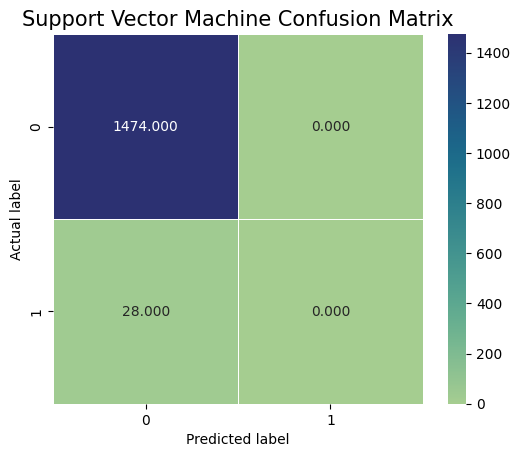

In [12]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap="crest");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Support Vector Machine Confusion Matrix', size = 15);
plt.show()

In [13]:
precision_macro_average = precision_score(y_test, predictions, average='macro')
precision_weighted_average = precision_score(y_test, predictions, average='weighted')

recall_macro_average = recall_score(y_test, predictions, average='macro')
recall_weighted_average = recall_score(y_test, predictions, average='weighted')

f1_macro_average = f1_score(y_test, predictions, average='macro')
f1_weighted_average = f1_score(y_test, predictions, average='weighted')


print(f'Precision (macro average)--> {round(precision_macro_average*100, 2)}%')
print(f'Precision (weighted average)--> {round(precision_weighted_average*100, 2)}%')

print(f'Recall (macro average)--> {round(recall_macro_average*100, 2)}%')
print(f'Recall (weighted average)--> {round(recall_weighted_average*100, 2)}%')

print(f'F1 score (macro average)--> {round(f1_macro_average*100, 2)}%')
print(f'F1 score (weighted average)--> {round(f1_weighted_average*100, 2)}%')

Precision (macro average)--> 49.07%
Precision (weighted average)--> 96.31%
Recall (macro average)--> 50.0%
Recall (weighted average)--> 98.14%
F1 score (macro average)--> 49.53%
F1 score (weighted average)--> 97.21%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1474
           1       0.00      0.00      0.00        28

    accuracy                           0.98      1502
   macro avg       0.49      0.50      0.50      1502
weighted avg       0.96      0.98      0.97      1502



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# File path on Google Drive
file_path = "/content/drive/MyDrive/year 29/Data Science /notebooks/spotify/model/f1_scores.json"

# Serialize f1 scores into a json file for later comparison between all models
model_name = "updated_support_vector_machine"
entry = {"f1_macro_average":f1_macro_average, "f1_weighted_average":f1_weighted_average}


with open(file_path, "r") as file:
    data = json.load(file)
data[model_name] = entry
with open(file_path, "w") as file:
    json.dump(data, file, indent=4)


